In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn import svm
# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score,KFold
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

## Loading the dataset

In [2]:
df = pd.read_csv("superstore_data.csv")

In [3]:
# let's view the first 5 rows of the data
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.000,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.000,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.000,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.000,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.000,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


### Checking the shape of the dataset


In [4]:
# Checking the number of rows and columns in the data
df.shape

(2240, 22)

* The dataset contains information (22 attributes) about 2240 rows


### Checking the data types of the columns for the dataset

In [5]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- There are a total of 22 columns and 2,240 observations in the dataset
- We can see that income column has null values
- Dt_Customer should be date type

### Statistical summary of the dataset

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2240.000,NaN,NaN,NaN,5592.160,3246.662,0.000,2828.250,5458.500,8427.750,11191.000
Year_Birth,2240.000,NaN,NaN,NaN,1968.806,11.984,1893.000,1959.000,1970.000,1977.000,1996.000
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.000,NaN,NaN,NaN,52247.251,25173.077,1730.000,35303.000,51381.500,68522.000,666666.000
Kidhome,2240.000,NaN,NaN,NaN,0.444,0.538,0.000,0.000,0.000,1.000,2.000
Teenhome,2240.000,NaN,NaN,NaN,0.506,0.545,0.000,0.000,0.000,1.000,2.000
Dt_Customer,2240,663,8/31/2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.000,NaN,NaN,NaN,49.109,28.962,0.000,24.000,49.000,74.000,99.000
MntWines,2240.000,NaN,NaN,NaN,303.936,336.597,0.000,23.750,173.500,504.250,1493.000


**Observations:**
- `Year_Birth` has a large range of values i.e. 1893 to 1996. 
- The birth year <=1900 is some users.. It's very unlikely that the person is alive. It may be a reporting error. We will explore this further.
- Income has a max value of 666666 which is far greater than the mean and could be an outlier.
- Columns - `Income, MntFruits, MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts` might have outliers on the right end as there is a large difference between 75th percentile and maximum values.
- Recency has an approx equal mean and median which is equal to 49 days.
- Highest mean amount spent per customer in the last two years is on wines (approx 304), followed by meat products (approx 167).

### Checking for duplicate values



In [7]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

### Checking for missing values

In [8]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Id                    0.000
Year_Birth            0.000
Education             0.000
Marital_Status        0.000
Income                1.070
Kidhome               0.000
Teenhome              0.000
Dt_Customer           0.000
Recency               0.000
MntWines              0.000
MntFruits             0.000
MntMeatProducts       0.000
MntFishProducts       0.000
MntSweetProducts      0.000
MntGoldProds          0.000
NumDealsPurchases     0.000
NumWebPurchases       0.000
NumCatalogPurchases   0.000
NumStorePurchases     0.000
NumWebVisitsMonth     0.000
Response              0.000
Complain              0.000
dtype: float64

- Income column has 1.07% missing values

# Feature Engineering <a class="anchor"  id="chapter2"></a>

In [9]:
data = df.copy()

In [10]:
# Dropping column - Id
data.drop(columns=["Id"], inplace=True)

In [11]:
#converting to date time object
data.Dt_Customer = data.Dt_Customer.apply(lambda x : pd.to_datetime(str(x)))
data.Dt_Customer.describe()

count                    2240
unique                    663
top       2012-08-31 00:00:00
freq                       12
first     2012-01-08 00:00:00
last      2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

In [12]:
# To calculate age we'll subtract the year 2021 because variables account for the last 2 years
# and we have customers registered till 2014 only
# We need to convert strings values to dates first to use subtraction
data["Age"] = 2021 - pd.to_datetime(data["Year_Birth"], format="%Y").apply(lambda x: x.year)

data["Age"].sort_values()

562      25
1824     25
697      26
1468     26
964      26
       ... 
1740     80
2171     81
2233    121
827     122
513     128
Name: Age, Length: 2240, dtype: int64

- We can see that there are few observations with ages greater than 100 which is highly unlikely to be true.
- We can drop the observations with age greater than 100

In [13]:
data[data["Age"] > 100]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
513,1893,2n Cycle,Single,60182.000,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,128
827,1899,PhD,Together,83532.000,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,122
2233,1900,2n Cycle,Divorced,36640.000,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,1,121


- The Year_Birth for these 3 observations seems to be incorrect
- Replacing them with some other values might not be the best thing to do
- We will drop these 3 observations

In [14]:
# Dropping the 3 observations with age > 100
data.drop(data[data["Age"] > 100].index, inplace=True)

**Using Dt_Customer to add features to the data**

In [15]:
# Extracting registration year from the date
data["Reg_year"] = data["Dt_Customer"].apply(lambda x: x.year)

# Extracting registration quarter from the date
data["Reg_quarter"] = data["Dt_Customer"].apply(lambda x: x.quarter)

# Extracting registration month from the date
data["Reg_month"] = data["Dt_Customer"].apply(lambda x: x.month)

# Extracting registration week from the date
data["Reg_week"] = data["Dt_Customer"].apply(lambda x: x.day // 7)

In [16]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week
0,1970,Graduation,Divorced,84835.000,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,51,2014,2,6,2
1,1961,Graduation,Single,57091.000,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,60,2014,2,6,2
2,1958,Graduation,Married,67267.000,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,63,2014,2,5,1
3,1967,Graduation,Together,32474.000,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,54,2014,4,11,0
4,1989,Graduation,Single,21474.000,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,32,2014,3,8,0


**Let's check the count of each unique category in each of the categorical variables.** 

In [17]:
# Making a list of all categorical variables
cat_col = [
    "Education",
    "Marital_Status",
    "Kidhome",
    "Teenhome",
    "Complain",
    "Response",
    "Reg_year",
    "Reg_quarter",
    "Reg_month",
    "Reg_week",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64
----------------------------------------
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64
----------------------------------------
0    1291
1     898
2      48
Name: Kidhome, dtype: int64
----------------------------------------
0    1156
1    1029
2      52
Name: Teenhome, dtype: int64
----------------------------------------
0    2217
1      20
Name: Complain, dtype: int64
----------------------------------------
0    1903
1     334
Name: Response, dtype: int64
----------------------------------------
2013    1187
2014     556
2012     494
Name: Reg_year, dtype: int64
----------------------------------------
4    596
1    580
2    545
3    516
Name: Reg_quarter, dtype: int64
----------------------------------------
8     211
10    209
3     202
12 

- In education, 2n cycle and Master means the same thing. We can combine these two categories.
- There are many categories in marital status. We can combine the categories 'Alone', 'Absurd' and 'YOLO' with 'Single' and 'Together' categories with 'Married'.
- There are only 20 customers who complained in the last two years.
- In 'Response' we have 1903 observations for the 0 class but only 334 observations for class 1.
- There are only three years in the customer registration data.

In [18]:
# Replacing 2n Cycle with Master
data["Education"] = data["Education"].replace("2n Cycle", "Master")

In [19]:
# Replacing YOLO, Alone, Absurd with single and Together with Married
data["Marital_Status"] = data["Marital_Status"].replace(["YOLO", "Alone", "Absurd"], "Single")
data["Marital_Status"] = data["Marital_Status"].replace(["Together"], "Married")

**We can add a column - total amount spent by each customer in the last 2 years**

In [20]:
data["Total_Amount_Spent"] = data[
    [
        "MntWines",
        "MntFruits",
        "MntMeatProducts",
        "MntFishProducts",
        "MntSweetProducts",
        "MntGoldProds",
    ]
].sum(axis=1)

# Exploratory Data Analysis (EDA) Summary <a class="anchor"  id="chapter3"></a>

**Detailed EDA is moved to the end, over here we will just look at the important aspects**

- We will define a few functions which will help in our Analysis

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [23]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Univariate analysis

**1| Income**

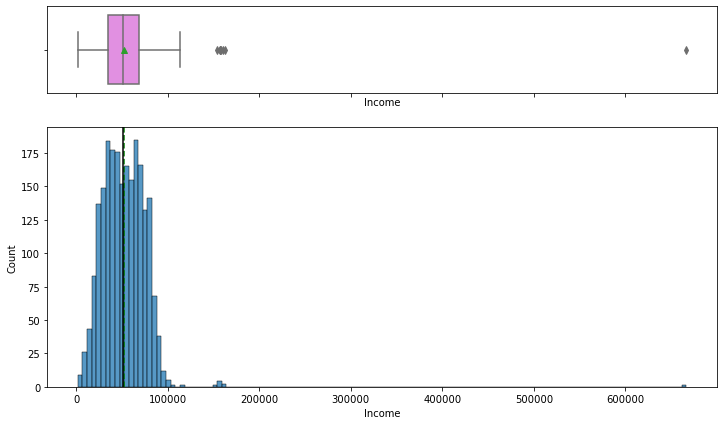

In [24]:
# observations on Income
histogram_boxplot(data, "Income")

- We can see there are some outliers in the income variable.
- Some variation is always expected in real-world scenarios for the income variable but we can remove the data point on the extreme right end of the boxplot as it can be a data entry error.

In [25]:
data[data["Income"] > 200000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week,Total_Amount_Spent
527,1977,Graduation,Married,666666.000,1,0,2013-02-06,23,9,14,18,8,1,12,4,3,1,3,6,0,0,44,2013,1,2,0,62


In [26]:
# Dropping observaion with income greater than 20000. Since there is just 1 such observation
data.drop(index=data[data.Income > 200000].index, inplace=True)

**2| MntMeatProducts**

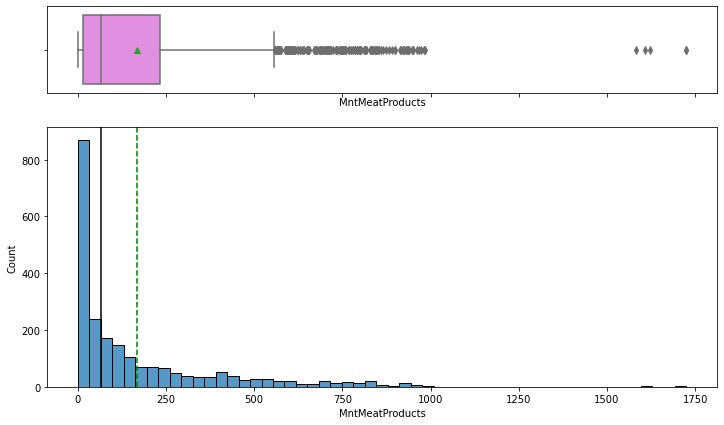

In [27]:
# observations on MntMeatProducts
histogram_boxplot(data, "MntMeatProducts")

- The distribution for the amount spent on meat products is highly skewed to the right.
- We can see that there are some extreme observations in the variable that can be considered as outliers as they very far from the rest of the values. 
- We can cap the value of the variable to the next highest value.

In [28]:
# Checking 10 largest values of amount spend on meat products
data.MntMeatProducts.nlargest(10)

325     1725
961     1725
497     1622
1213    1607
2204    1582
1921     984
53       981
994      974
2021     968
1338     961
Name: MntMeatProducts, dtype: int64

In [29]:
data[data["MntMeatProducts"] > 1580]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week,Total_Amount_Spent
325,1977,Graduation,Married,157146.000,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,44,2013,2,4,4,1730
497,1982,PhD,Married,160803.000,0,0,2012-04-08,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,39,2012,2,4,1,1717
961,1979,Graduation,Married,2447.000,1,0,2013-06-01,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,42,2013,2,6,0,1730
1213,1978,Master,Married,NaN,0,0,2012-12-08,53,32,2,1607,12,4,22,0,0,0,1,0,0,0,43,2012,4,12,1,1679
2204,1973,PhD,Married,157243.000,0,1,2014-01-03,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,48,2014,1,1,0,1608


- The values for MntMeatProducts for these 5 observations need not be incorrect
- So, dropping them will lead us to loss of information
- Let's cap them with next highest value

In [30]:
# Capping values for amount spent on meat products at next highest value i.e. 984
data["MntMeatProducts"].clip(upper=984, inplace=True)

**3| MntSweetProducts**

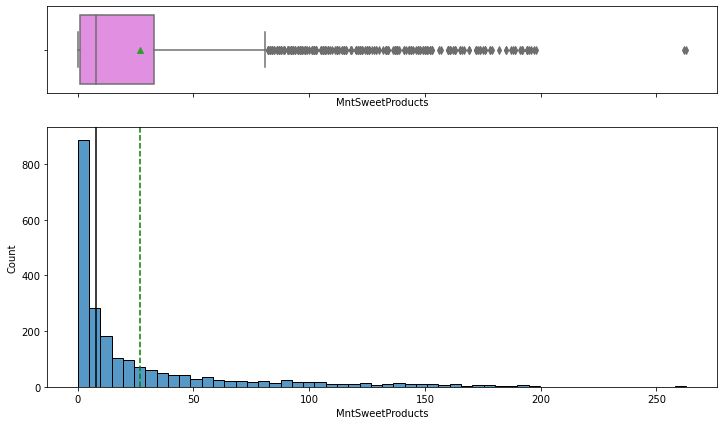

In [31]:
# observations on MntSweetProducts
histogram_boxplot(data, "MntSweetProducts")

- The distribution for the amount spent on sweet products is right-skewed 
- There is one observation to the right extreme which can be considered as an outlier. 
- We will not remove all such data points as they represent real market trends but we can cap some of the extreme values.

In [32]:
data[data["MntSweetProducts"] > 200]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week,Total_Amount_Spent
210,1945,PhD,Single,113734.000,0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,76,2014,2,5,4,277
449,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,35,2013,1,2,2,637


- The values for MntSweetProducts for these 2 observations need not be incorrect
- So, dropping them will lead us to loss of information
- Let's cap them with next highest value

In [33]:
# Capping values for amount spent on sweet products at 198
data["MntSweetProducts"].clip(upper=198, inplace=True)

**4| MntGoldProds**

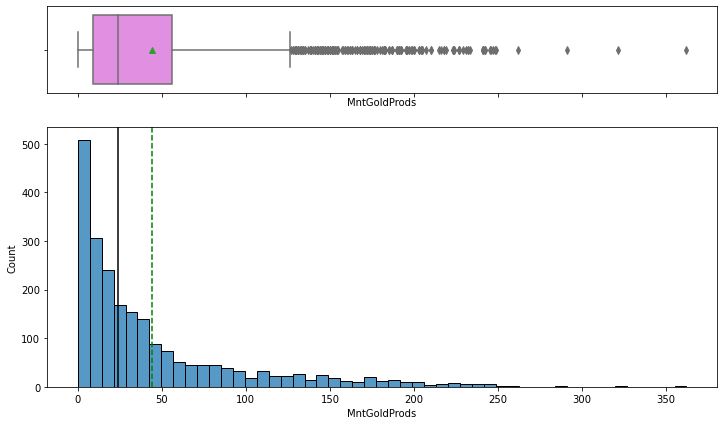

In [34]:
# observations on MntGoldProds
histogram_boxplot(data, "MntGoldProds")

- The distribution for the amount spent on gold products is right-skewed 
- There are some outliers in the amount spent on gold products. We will not remove all such data points as they represent real market trends but we can cap some of the extreme values.

In [35]:
data[data["MntGoldProds"] > 250]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week,Total_Amount_Spent
14,1969,Graduation,Married,4428.000,0,1,2013-05-10,0,16,4,12,2,4,321,0,25,0,0,1,0,0,52,2013,2,5,1,359
60,1982,Master,Single,6560.000,0,0,2013-12-12,2,67,11,26,4,3,262,0,1,0,1,17,0,0,39,2013,4,12,1,373
449,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,198,362,0,27,0,0,1,0,0,35,2013,1,2,2,637
2063,1966,PhD,Single,7144.000,0,2,2013-07-12,92,81,4,33,5,2,291,0,23,1,1,0,0,0,55,2013,3,7,1,416


- The values for MntGoldProds for these 4 observations need not be incorrect
- So, dropping them will lead us to loss of information
- Let's cap them with next highest value

In [36]:
data["MntGoldProds"].clip(upper=250, inplace=True)

**5| MntWines**

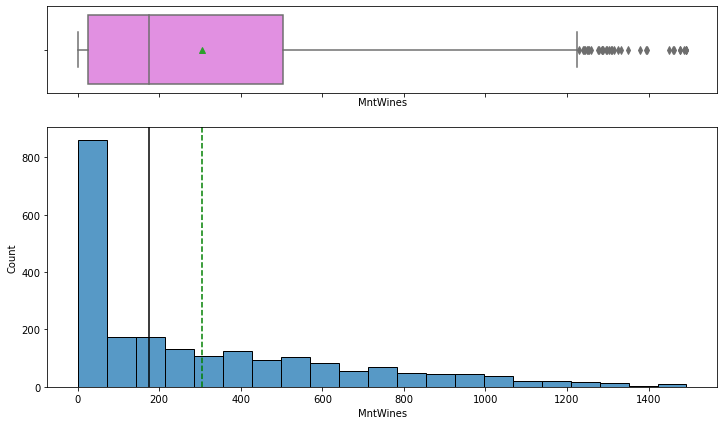

In [37]:
# observations on MntWines
histogram_boxplot(data, "MntWines")

- The distribution for the amount spent on wines is highly skewed to the right
- As the median of the distribution is less than 200, more than 50% of customers have spent less than 200 on wines.
- There are some outliers on the right end of the boxplot but we will not treat them as some variation is always expected in real-world scenarios for variables like amount spent.

**6| NumWebPurchases**

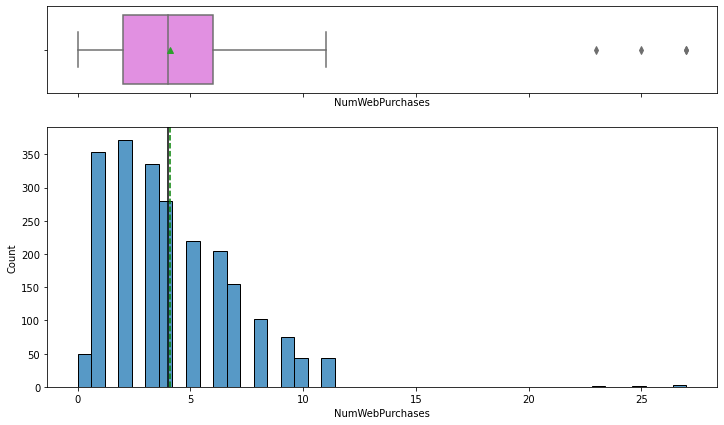

In [38]:
# observations on NumWebPurchases
histogram_boxplot(data, "NumWebPurchases")

- The median of the distribution is 4 i.e. 50% of customers have 4 or less than 4 web purchases. 
- We can see that there are some extreme observations in the variable. We can cap these values to the next highest number of purchases.

In [39]:
data[data["NumWebPurchases"] > 15]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week,Total_Amount_Spent
14,1969,Graduation,Married,4428.000,0,1,2013-05-10,0,16,4,12,2,4,250,0,25,0,0,1,0,0,52,2013,2,5,1,359
210,1945,PhD,Single,113734.000,0,0,2014-05-28,9,6,2,3,1,198,3,0,27,0,0,1,0,0,76,2014,2,5,4,277
449,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,198,250,0,27,0,0,1,0,0,35,2013,1,2,2,637
2063,1966,PhD,Single,7144.000,0,2,2013-07-12,92,81,4,33,5,2,250,0,23,1,1,0,0,0,55,2013,3,7,1,416


- The values for NumWebPurchases for these 4 observations need not be incorrect
- So, dropping them will lead us to loss of information
- Let's cap them with next highest value

In [40]:
# Capping values for number of web purchases at 11
data["NumWebPurchases"].clip(upper=11, inplace=True)

**7| NumWebVisitsMonth**

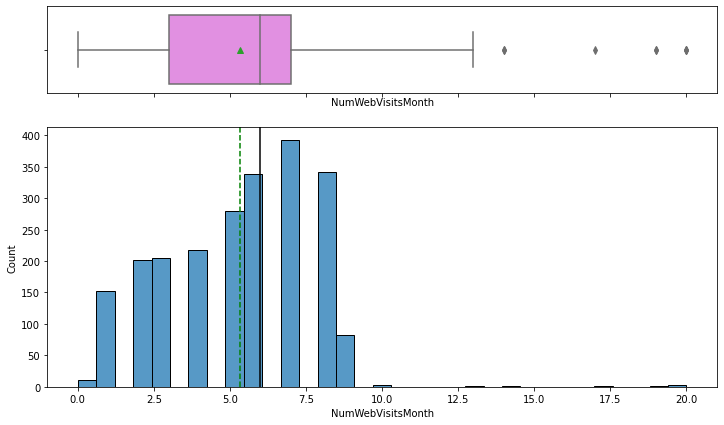

In [41]:
# observations on NumWebVisitsMonth
histogram_boxplot(data, "NumWebVisitsMonth")

- The distribution for the number of visits in a month is skewed and has some outliers at the right end.
- We will not treat this as this represents a general market trend

**8| NumCatalogPurchases**

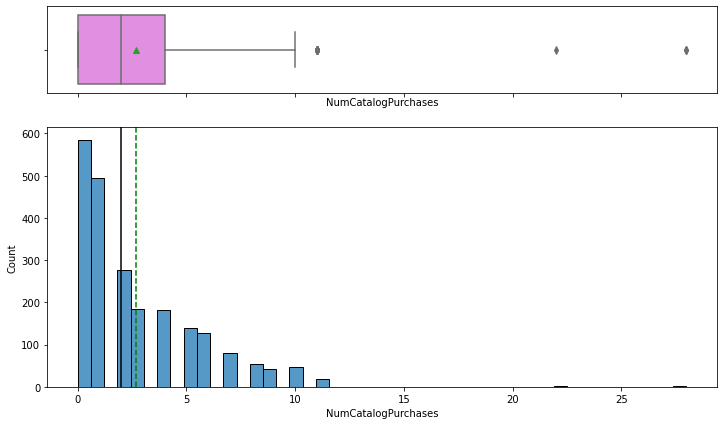

In [42]:
# observations on NumCatalogPurchases
histogram_boxplot(data, "NumCatalogPurchases")

- The most number of observations are for 0 catalog purchases.
- The median of the distribution is 2 i.e. 50% of customers have 2 or less than 2 catalog purchases. 
- We can see that there is two extreme observation in the variable. We can cap these values to the next highest number of purchases.

In [43]:
data[data["NumCatalogPurchases"] > 15]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week,Total_Amount_Spent
325,1977,Graduation,Married,157146.000,0,0,2013-04-29,13,1,0,984,2,1,1,0,0,28,0,1,0,0,44,2013,2,4,4,1730
497,1982,PhD,Married,160803.000,0,0,2012-04-08,21,55,16,984,17,3,4,15,0,28,1,0,0,0,39,2012,2,4,1,1717
961,1979,Graduation,Married,2447.000,1,0,2013-06-01,42,1,1,984,1,1,1,15,0,28,0,1,0,0,42,2013,2,6,0,1730
2204,1973,PhD,Married,157243.000,0,1,2014-01-03,98,20,2,984,1,2,1,15,0,22,0,0,0,0,48,2014,1,1,0,1608


In [44]:
# Capping values for number of catalog purchases at 11
data["NumCatalogPurchases"].clip(upper=11, inplace=True)

**9| Complain**

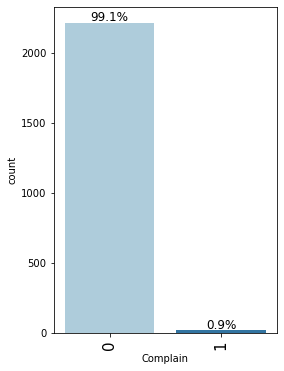

In [45]:
# observations on Complain
labeled_barplot(data, "Complain", perc=True)

- Approx 99% of customers had no complaint in the last 2 years. This might be because the company provides good services or might be due to the lack of feedback options for customers.

**10| Teenhome**

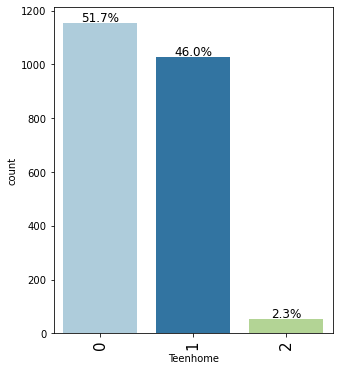

In [46]:
# observations on Teenhome
labeled_barplot(data, "Teenhome", perc=True)

- Majority of the customers i.e. ~52% customers have no teen at home
- There are very few customers, only ~2%, with a number of teens greater than 1 

**11| Response**

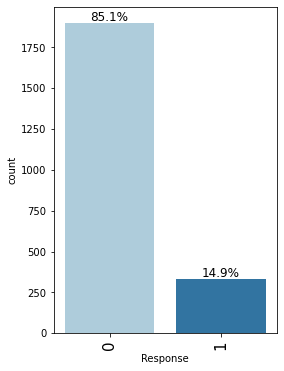

In [47]:
# observations on Response
labeled_barplot(data, "Response", perc=True)

- Approx 85% customer's response was NO in the last campaign.
- This shows that the distribution of classes in the target variable is imbalanced. We have only ~15% observations where response is YES.

## Bivariate Analysis

**MntWines, MntGoldProds, MntMeatProducts, MntFruits, MntFishProducts, MntSweetProducts**

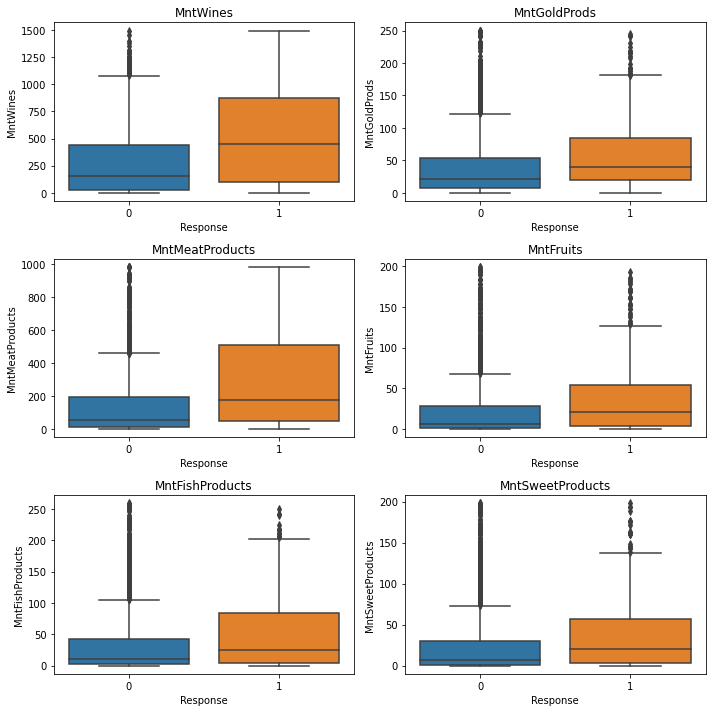

In [48]:
cols = data[
    [
        "MntWines",
        "MntGoldProds",
        "MntMeatProducts",
        "MntFruits",
        "MntFishProducts",
        "MntSweetProducts",
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Response"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Each plot shows that customer spending more on any product is more likely to take the offer. 

**Reg_year & Reg_month vs Total_Amount_Spent**

<AxesSubplot:xlabel='Reg_year,Reg_month'>

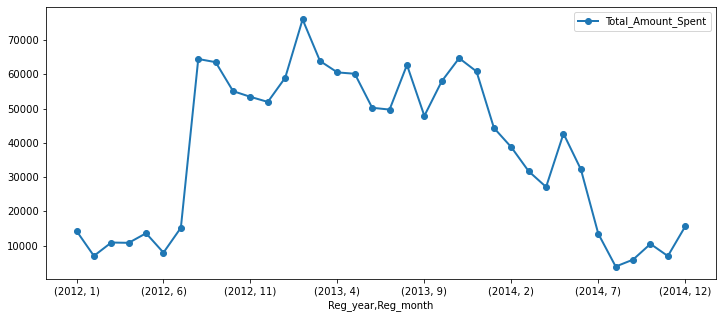

In [49]:
pd.pivot_table(
    data=data,
    index=["Reg_year", "Reg_month"],
    values="Total_Amount_Spent",
    aggfunc=np.sum,
).plot(kind="line", marker="o", linewidth=2, figsize=(12, 5))

- The plot clearly shows that the total amount spent has declined over the years.
- The plot shows the highest increase in the amount spent from August to September 2012. 

**Total_Amount_Spent vs Income**

<AxesSubplot:xlabel='Income', ylabel='Total_Amount_Spent'>

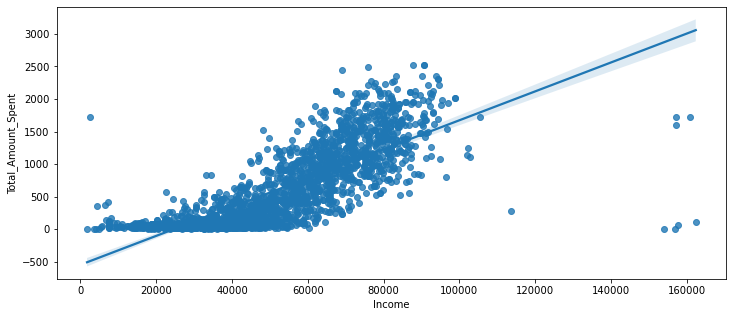

In [50]:
plt.figure(figsize=(12, 5))
sns.regplot(y=data.Total_Amount_Spent, x=data.Income)

- We can see that income and the total amount spent have a positive correlation.
- The total amount spent is not much different for customers with income in the range of 20K to 60K but the difference is significant for customers in the range of 60K to 100K.

# Data Preprocessing <a class="anchor"  id="chapter4"></a>

**We will be imputing the missing values in the data after splitting into train, validation, and test sets to avoid data leakage.**

## Data Preparation for Modeling

In [51]:
data1 = data.copy()


In [52]:
# Dropping birth year and Dt_Customer columns
data1.drop(
    columns=[
        "Year_Birth",
        "Dt_Customer",
        "Reg_quarter",
        "Total_Amount_Spent",
    ],
    inplace=True,
)

# Missing-Value Treatment

In [53]:
imputer = SimpleImputer(strategy="median")
data1['Income'] = pd.DataFrame(imputer.fit_transform(pd.DataFrame(data1['Income'], columns=['Income'])), columns=['Income'])
data1.dropna(axis = 0,inplace=True)

In [54]:
# Separating target variable and other variables
X = data1.drop(columns="Response")
Y = data1["Response"]

In [55]:
X.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Reg_year,Reg_month,Reg_week
0,Graduation,Divorced,84835.000,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,51,2014,6,2
1,Graduation,Single,57091.000,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,60,2014,6,2
2,Graduation,Married,67267.000,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,63,2014,5,1
3,Graduation,Married,32474.000,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,54,2014,11,0
4,Graduation,Single,21474.000,1,0,0,6,16,24,11,0,34,2,3,1,2,7,0,32,2014,8,0


In [56]:
# performing Chi square test for feature selection for categorical variables
from sklearn.feature_selection import chi2

In [57]:
X.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Age                    0
Reg_year               0
Reg_month              0
Reg_week               0
dtype: int64

In [58]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)


print(X_train.shape, X_val.shape, X_test.shape)

(1338, 22) (447, 22) (447, 22)


In [59]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Age                    0
Reg_year               0
Reg_month              0
Reg_week               0
dtype: int64
------------------------------
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWeb

# Detailed Exploratory Data Analysis (EDA) <a class="anchor"  id="chapter11"></a>

### Univariate Analysis

**1| Age**

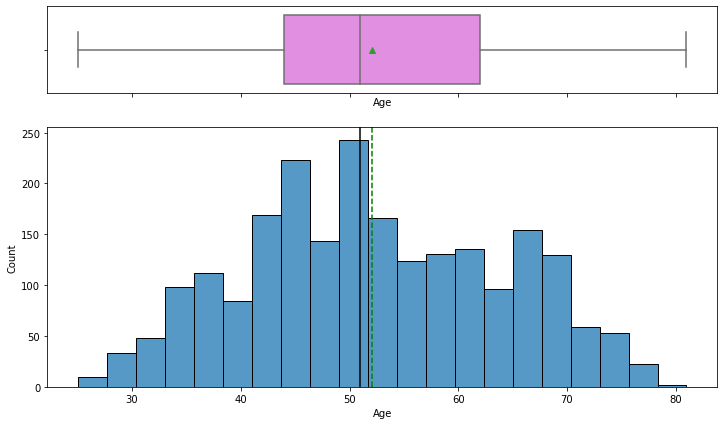

In [60]:
# Observations on Customer_age
histogram_boxplot(data, "Age")

- As per the boxplot, there are no outliers in the 'Age' variable
- Age has a fairly normal distribution with approx equal mean and median

**2| NumStorePurchases**

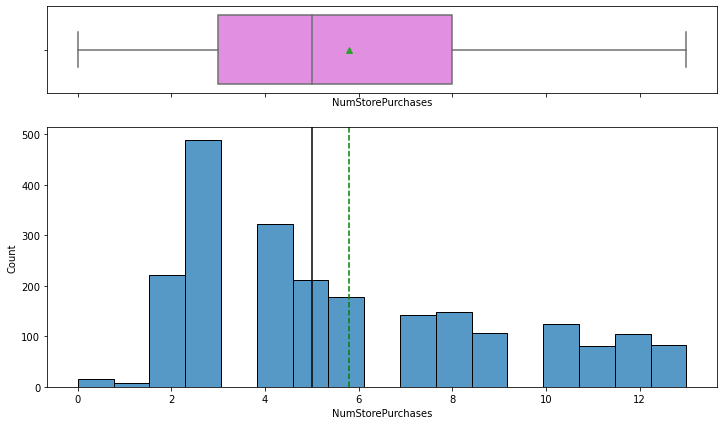

In [61]:
# observations on NumStorePurchases
histogram_boxplot(data, "NumStorePurchases")

- There are very few observations with less than 2 purchases from the store
- Most of the customers have 4 or 5 purchases from the store
- There are no outliers in this variable

**3| NumDealsPurchases**

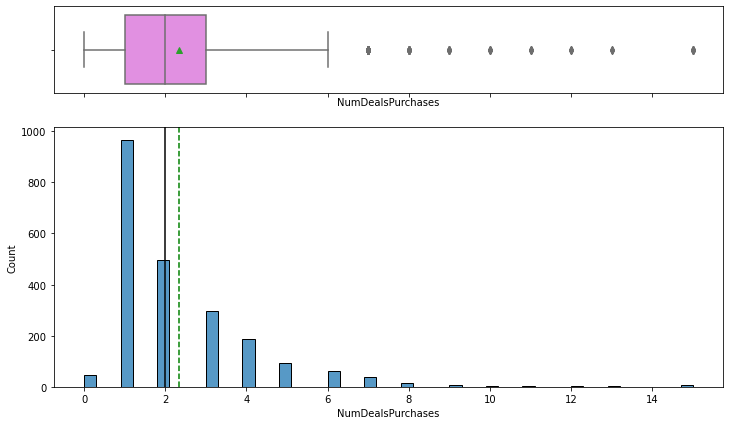

In [62]:
# observations on NumDealsPurchases
histogram_boxplot(data, "NumDealsPurchases")

- Majority of the customers have 2 or less than 2 deal purchases. 
- We can see that there some extreme observations in the variable. This represents the real market trend.

**4| Recency**

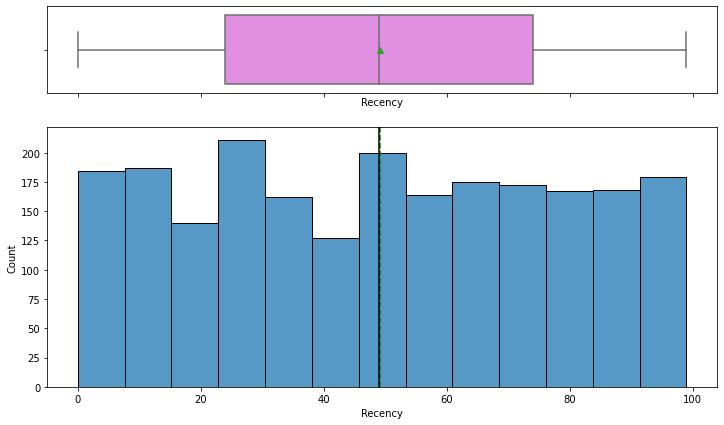

In [63]:
# observations on Recency
histogram_boxplot(data, "Recency")

- There are no outliers in the 'Recency' variable
- The distribution is fairly symmetric and uniformly distributed.

**5| MntFruits**

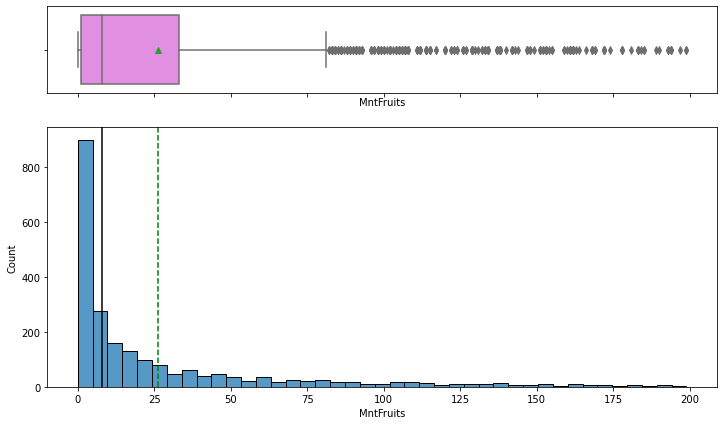

In [64]:
# observations on MntFruits
histogram_boxplot(data, "MntFruits")

- The distribution for the amount spent on fruits is highly skewed to the right.
- As the median of the distribution is less than 20, more than 50% of customers have spent less than 20 on fruits.
- There are some outliers on the right end of the boxplot but we will not treat them as some variation is always expected in real-world scenarios for variables like amount spent.

**6| MntFishProducts**

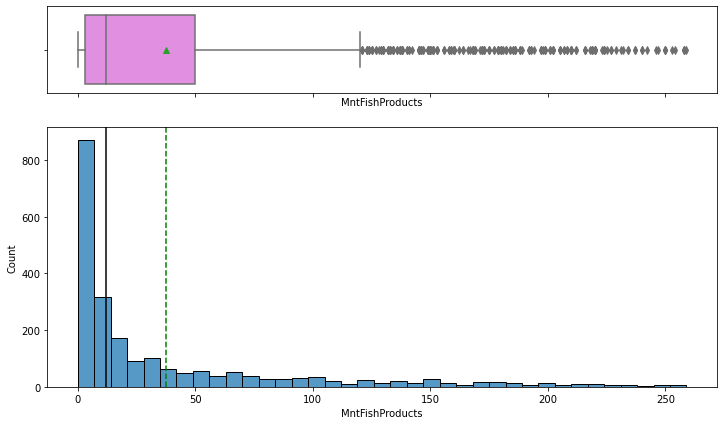

In [65]:
# observations on MntFishProducts
histogram_boxplot(data, "MntFishProducts")

- The distribution for the amount spent on fish products is right-skewed
- There are some outliers on the right end in the boxplot but we will not treat them as this represents a real market trend that some customers spend more on fish products than others.

**7| Reg_week**

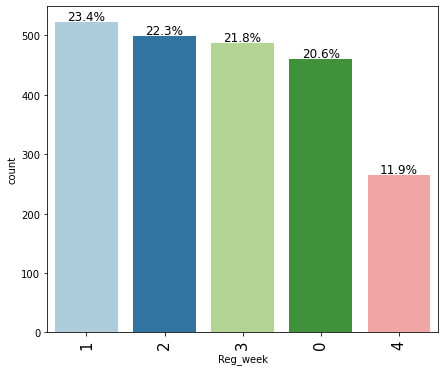

In [66]:
# observations on Registration week
labeled_barplot(data, "Reg_week", perc = True)

- This shows that the number of registrations declines at the end of the month i.e. in the last two weeks.
- This can be because most people get salaries on the last day or first day of the month.

**8| Marital_Status**

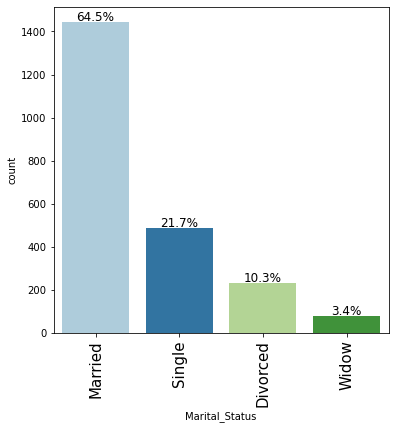

In [67]:
# observations on Marital_Status
labeled_barplot(data, "Marital_Status",perc = True)

- Majority of the customers are married comprising approx ~64% of total customers.

**9| Education**

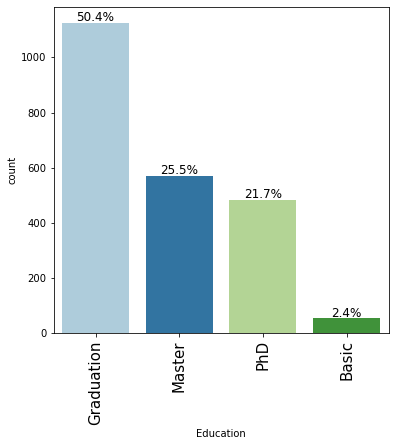

In [68]:
# observations on Education
labeled_barplot(data, "Education",perc = True)

- Education of approx ~50% of customers is at graduation level.
- Very few observations i.e. ~2% for customers with basic level education

**10| Kidhome**

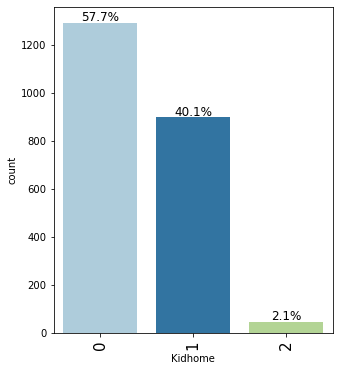

In [69]:
# observations on Kidhome
labeled_barplot(data, "Kidhome",perc = True)

- ~40% of customers have 1 kid and ~58% of customers have no kids at home
- There are very few customers, approx 2%, with a number of kids greater than 1 

**11| Reg_year**

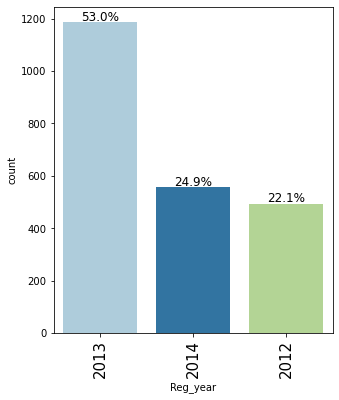

In [70]:
# observations on Registration year
labeled_barplot(data, "Reg_year",perc = True)

- The number of customers registered is highest in the year 2013.

**12| Reg_quarter**

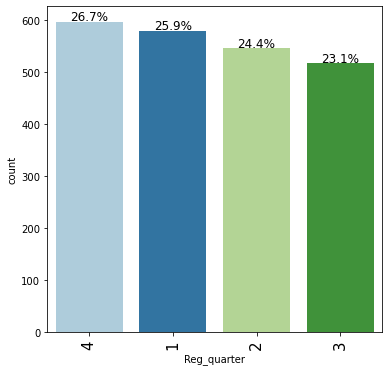

In [71]:
# observations on Registration quarter
labeled_barplot(data, "Reg_quarter",perc = True)

- There is no significant difference in the number of registrations for each quarter.
- The number of registrations is slightly higher for the 1st and the 4th quarter. This can be due to the festival season in these months.
- Let's explore this further by plotting the count of registration per month.

**13| Reg_month**

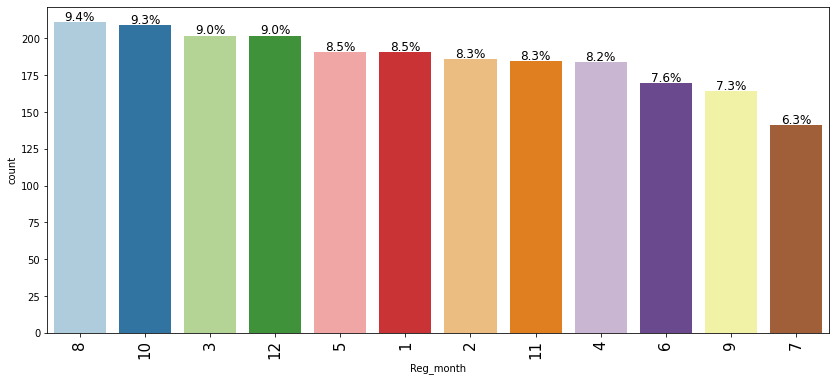

In [72]:
# observations on Registration month
labeled_barplot(data, "Reg_month",perc = True)

- This shows that the highest number of registration is in the months of winters i.e. March, May, August, October.
- There is approx 3% reduction in the number of registrations from June to July.

### Bivariate Analysis

**Correlation Check**

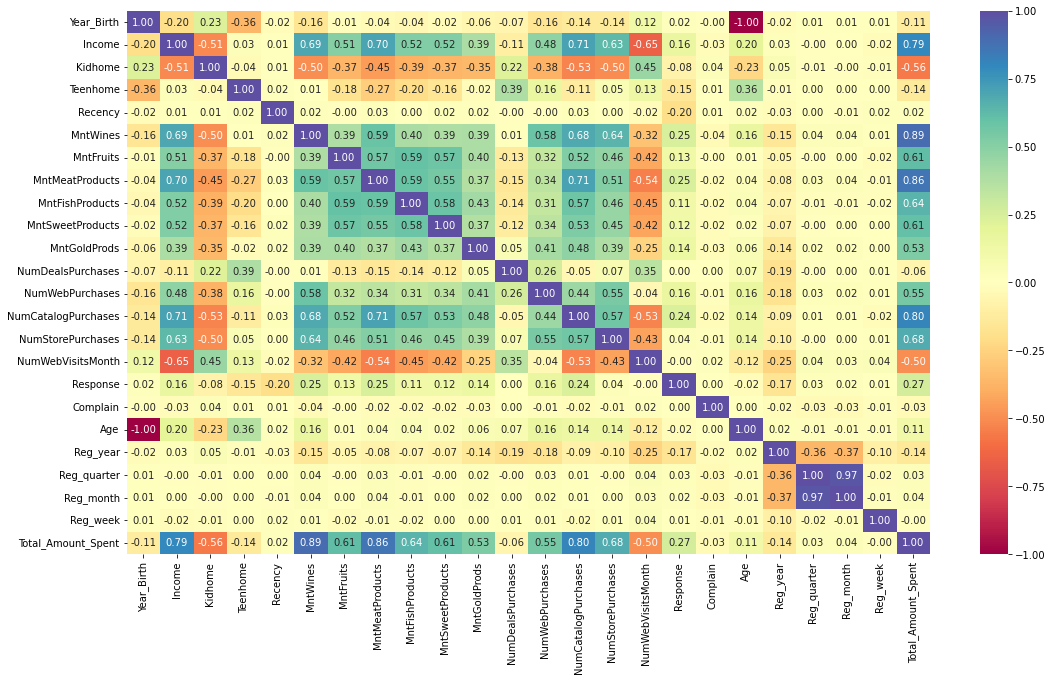

In [73]:
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- As expected, age and year of birth have a high negative correlation. We can drop one of them.
- Registration month and quarter columns are highly correlated which can be expected as we extracted these columns from the same column.
- We can drop one of the columns in a quarter or month as they are almost perfectly correlated.
- Total amount spent is correlated with variables they are associated with and hence we can drop this column.
- Number of purchases is positively correlated with income which can be expected as customers with higher income might spend more than customers with lower income.

**Pair Plot**

In [74]:
#sns.pairplot(data, hue="Response")

- There are overlaps i.e. no clear distinction in the distribution of variables for people who have taken the product and did not take the product.
- Let's explore this further with the help of other plots.

**Total_Amount_Spent vs Education**

<AxesSubplot:xlabel='Education', ylabel='Total_Amount_Spent'>

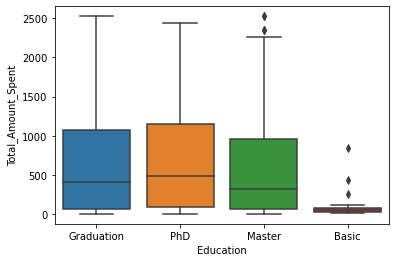

In [75]:
sns.boxplot(y="Total_Amount_Spent", x="Education", data=data, orient="vertical")

- As expected, the amount spent increases with the increase in education level.
- Customers with graduate-level education spend slightly more than customers with master-level education. 

**Total_Amount_Spent vs Marital_status**

<AxesSubplot:xlabel='Marital_Status', ylabel='Total_Amount_Spent'>

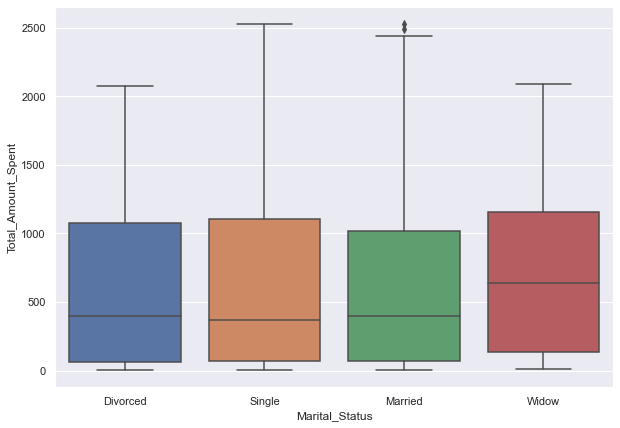

In [76]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Amount_Spent", x="Marital_Status", data=data, orient="vertical")

- We can see that the total amount spent is higher for widowed customers.
- No significant difference in the amount spent by single, married or divorced customers.

**Recency, Age, Income, Total_Amount_Spent**

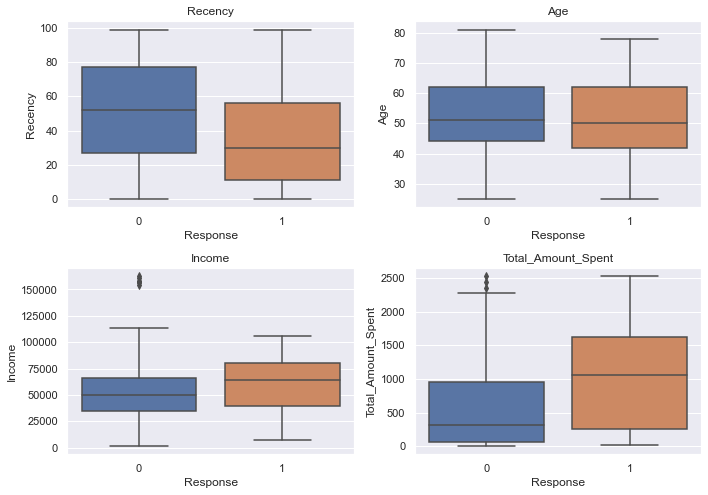

In [77]:
cols = data[["Recency", "Age", "Income", "Total_Amount_Spent"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Response"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Customers with lower recency i.e. less number of days since the last purchase, are more likely to take the offer.
- Response does not depend much on age.
- Customers with higher income are more likely to take the offer.
- Customers who spent more in the last 2 years are more likely to take the offer.

**Education vs Response**

Response       0    1   All
Education                  
All         1902  334  2236
Graduation   974  152  1126
PhD          384  101   485
Master       492   79   571
Basic         52    2    54
------------------------------------------------------------------------------------------------------------------------


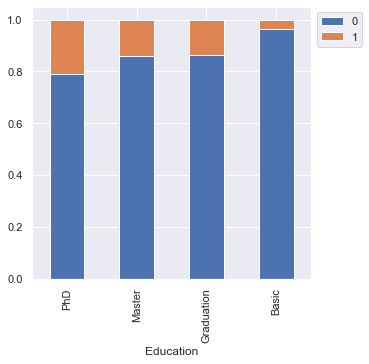

In [78]:
stacked_barplot(data, "Education", "Response")

- We can see a clear trend here that customers with higher education are more likely to take the offer.  

**Marital_Status vs Response**

Response           0    1   All
Marital_Status                 
All             1902  334  2236
Married         1284  158  1442
Single           377  109   486
Divorced         183   48   231
Widow             58   19    77
------------------------------------------------------------------------------------------------------------------------


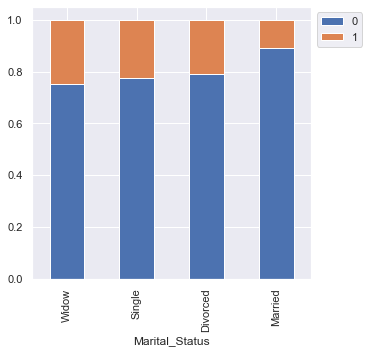

In [79]:
stacked_barplot(data, "Marital_Status", "Response")

- We saw earlier that number of married customers is much more than single or divorced but divorced/widow customers are more likely to take the offer.
- Single customers are more likely to take the offer than married customers.

**Kidhome vs Response**

Response     0    1   All
Kidhome                  
All       1902  334  2236
0         1069  222  1291
1          787  110   897
2           46    2    48
------------------------------------------------------------------------------------------------------------------------


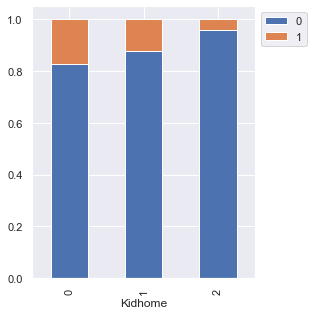

In [80]:
stacked_barplot(data, "Kidhome", "Response")

- We can see that the number of kids increases, chances of customers taking the offer decreases.
- Customers with no kids at home are more likely to take the offer which can be expected as this includes single customers as well.

**Teenhome vs Response**

Response     0    1   All
Teenhome                 
All       1902  334  2236
0          918  237  1155
1          937   92  1029
2           47    5    52
------------------------------------------------------------------------------------------------------------------------


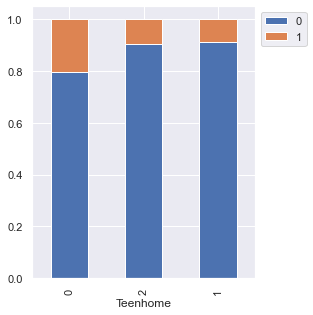

In [81]:
stacked_barplot(data, "Teenhome", "Response")

- Customers with no teens at home are most likely to take the offer.
- Customers with two teens are more likely to take the offer than customers with 1 teenager.

**Reg_year vs Response**

Response     0    1   All
Reg_year                 
All       1902  334  2236
2013      1032  154  1186
2012       362  132   494
2014       508   48   556
------------------------------------------------------------------------------------------------------------------------


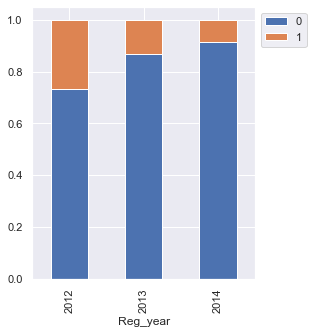

In [82]:
stacked_barplot(data, "Reg_year", "Response")

- Number of customers taking the offer is decreasing each subsequent year.
- Let's explore this further for month-wise distribution for each of the year.

# LogisticRegression

In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = LogisticRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print('Accuracy:',accuracy_score(y_val,y_pred))
print('Recall:',recall_score(y_val,y_pred))
print('Precision:',precision_score(y_val,y_pred))
#print('Confusion_matrix:',plot_confusion_matrix(y_val,y_pred))
print('Confusion_matrix:',confusion_matrix(y_val,y_pred))
print('ROC_AUC_SCORE:',roc_auc_score(y_val,y_pred))
print('F1_score:',f1_score(y_val,y_pred))

Accuracy: 0.8411633109619687
Recall: 0.04477611940298507
Precision: 0.3
Confusion_matrix: [[373   7]
 [ 64   3]]
ROC_AUC_SCORE: 0.513177533385703
F1_score: 0.0779220779220779


# KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = KNeighborsClassifier(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('Accuracy:',accuracy_score(y_val,y_pred))
print('Recall:',recall_score(y_val,y_pred))
print('Precision:',precision_score(y_val,y_pred))
#print('Confusion_matrix:',plot_confusion_matrix(y_val,y_pred))
print('Confusion_matrix:',confusion_matrix(y_val,y_pred))
print('ROC_AUC_SCORE:',roc_auc_score(y_val,y_pred))
print('F1_score:',f1_score(y_val,y_pred))

Accuracy: 0.8165548098434005
Recall: 0.07462686567164178
Precision: 0.2
Confusion_matrix: [[360  20]
 [ 62   5]]
ROC_AUC_SCORE: 0.5109976433621367
F1_score: 0.10869565217391304


# DecisionTreeClassifier

In [85]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = DecisionTreeClassifier(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('Accuracy:',accuracy_score(y_val,y_pred))
print('Recall:',recall_score(y_val,y_pred))
print('Precision:',precision_score(y_val,y_pred))
#print('Confusion_matrix:',plot_confusion_matrix(y_val,y_pred))
print('Confusion_matrix:',confusion_matrix(y_val,y_pred))
print('ROC_AUC_SCORE:',roc_auc_score(y_val,y_pred))
print('F1_score:',f1_score(y_val,y_pred))

Accuracy: 0.7651006711409396
Recall: 0.08955223880597014
Precision: 0.12
Confusion_matrix: [[336  44]
 [ 61   6]]
ROC_AUC_SCORE: 0.4868813825608798
F1_score: 0.10256410256410257


# SVM

In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = svm.SVC(kernel='rbf',C=10000)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('Accuracy:',accuracy_score(y_val,y_pred))
print('Recall:',recall_score(y_val,y_pred))
print('Precision:',precision_score(y_val,y_pred))
#print('Confusion_matrix:',plot_confusion_matrix(y_val,y_pred))
print('Confusion_matrix:',confusion_matrix(y_val,y_pred))
print('ROC_AUC_SCORE:',roc_auc_score(y_val,y_pred))
print('F1_score:',f1_score(y_val,y_pred))

Accuracy: 0.8501118568232662
Recall: 0.0
Precision: 0.0
Confusion_matrix: [[380   0]
 [ 67   0]]
ROC_AUC_SCORE: 0.5
F1_score: 0.0


# RandomForestClassifier

In [87]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = RandomForestClassifier(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('Accuracy:',accuracy_score(y_val,y_pred))
print('Recall:',recall_score(y_val,y_pred))
print('Precision:',precision_score(y_val,y_pred))
#print('Confusion_matrix:',plot_confusion_matrix(y_val,y_pred))
print('Confusion_matrix:',confusion_matrix(y_val,y_pred))
print('ROC_AUC_SCORE:',roc_auc_score(y_val,y_pred))
print('F1_score:',f1_score(y_val,y_pred))

Accuracy: 0.7986577181208053
Recall: 0.05970149253731343
Precision: 0.12903225806451613
Confusion_matrix: [[353  27]
 [ 63   4]]
ROC_AUC_SCORE: 0.494324430479183
F1_score: 0.08163265306122448


# GridSerachCV

In [ ]:
grid = {
    'n_estimators':[100,150,200,250,300,350,400,450,500],
    'max_features':['sqrt','log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy'],
    'random_state':[18]
}
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = GridSearchCV(estimator = step2,param_grid = grid,n_jobs = -1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('Accuracy:',accuracy_score(y_val,y_pred))
print('Recall:',recall_score(y_val,y_pred))
print('Precision:',precision_score(y_val,y_pred))
#print('Confusion_matrix:',plot_confusion_matrix(y_val,y_pred))
print('Confusion_matrix:',confusion_matrix(y_val,y_pred))
print('ROC_AUC_SCORE:',roc_auc_score(y_val,y_pred))
print('F1_score:',f1_score(y_val,y_pred))

# ExtraTreeClassifier

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = ExtraTreesClassifier(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=True)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('Accuracy:',accuracy_score(y_val,y_pred))
print('Recall:',recall_score(y_val,y_pred))
print('Precision:',precision_score(y_val,y_pred))
#print('Confusion_matrix:',plot_confusion_matrix(y_val,y_pred))
print('Confusion_matrix:',confusion_matrix(y_val,y_pred))
print('ROC_AUC_SCORE:',roc_auc_score(y_val,y_pred))
print('F1_score:',f1_score(y_val,y_pred))

# AdaBoostClassifier

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = AdaBoostClassifier(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('Accuracy:',accuracy_score(y_val,y_pred))
print('Recall:',recall_score(y_val,y_pred))
print('Precision:',precision_score(y_val,y_pred))
#print('Confusion_matrix:',plot_confusion_matrix(y_val,y_pred))
print('Confusion_matrix:',confusion_matrix(y_val,y_pred))
print('ROC_AUC_SCORE:',roc_auc_score(y_val,y_pred))
print('F1_score:',f1_score(y_val,y_pred))

# GradientBoostingClassifier

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = GradientBoostingClassifier(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('Accuracy:',accuracy_score(y_val,y_pred))
print('Recall:',recall_score(y_val,y_pred))
print('Precision:',precision_score(y_val,y_pred))
#print('Confusion_matrix:',plot_confusion_matrix(y_val,y_pred))
print('Confusion_matrix:',confusion_matrix(y_val,y_pred))
print('ROC_AUC_SCORE:',roc_auc_score(y_val,y_pred))
print('F1_score:',f1_score(y_val,y_pred))

# XGBClassifier

In [ ]:
import xgboost as xgb
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = xgb.XGBClassifier(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('Accuracy:',accuracy_score(y_val,y_pred))
print('Recall:',recall_score(y_val,y_pred))
print('Precision:',precision_score(y_val,y_pred))
#print('Confusion_matrix:',plot_confusion_matrix(y_val,y_pred))
print('Confusion_matrix:',confusion_matrix(y_val,y_pred))
print('ROC_AUC_SCORE:',roc_auc_score(y_val,y_pred))
print('F1_score:',f1_score(y_val,y_pred))

# VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier,StackingClassifier

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')


rf = RandomForestClassifier(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)
gbdt = GradientBoostingClassifier(n_estimators=100,max_features=0.5)
x = xgb.XGBClassifier(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesClassifier(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingClassifier([('rf', rf), ('gbdt', gbdt), ('x',x), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print('Accuracy:',accuracy_score(y_val,y_pred))
print('Recall:',recall_score(y_val,y_pred))
print('Precision:',precision_score(y_val,y_pred))
#print('Confusion_matrix:',plot_confusion_matrix(y_val,y_pred))
print('Confusion_matrix:',confusion_matrix(y_val,y_pred))
print('ROC_AUC_SCORE:',roc_auc_score(y_val,y_pred))
print('F1_score:',f1_score(y_val,y_pred))

# StackingClassifer

In [ ]:
from sklearn.ensemble import VotingClassifier,StackingClassifier
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')
estimators = [
    ('rf', RandomForestClassifier(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)),
    ('gbdt',GradientBoostingClassifier(n_estimators=100,max_features=0.5)),
    ('xgb', xgb.XGBClassifier(n_estimators=25,learning_rate=0.3,max_depth=5))
]
step2 = StackingClassifier(estimators=estimators, final_estimator=gbdt)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('Accuracy:',accuracy_score(y_val,y_pred))
print('Recall:',recall_score(y_val,y_pred))
print('Precision:',precision_score(y_val,y_pred))
#print('Confusion_matrix:',plot_confusion_matrix(y_val,y_pred))
print('Confusion_matrix:',confusion_matrix(y_val,y_pred))
print('ROC_AUC_SCORE:',roc_auc_score(y_val,y_pred))
print('F1_score:',f1_score(y_val,y_pred))

In [ ]:
import pickle

pickle.dump(data1,open('data1.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

# Insights 
Total amount spent has decreased over the years, which shows that either the quality of products has declined or the company lacks marketing strategies
The company should constantly improve its marketing strategies to address such issues
Our analysis showed that ~99% of customers had no complaints in the last two years, which can be due to the lack of feedback options for customers
The company should create easy mechanisms to gather feedback from the customers and use it to identify major concerns if any
The company should target customers who buy premium products - gold products or high-quality wines - as these customers can spend more and are more likely to purchase the offer
The company should further launch premium offers for such customers
Such offers can also be extended to customers with higher income
The number of web visits is an important feature and the company should work on customizing its website to direct more traffic to the website
The company can improve the interface and provide easy check-in, check-out, and delivery options
Customers who are frequent buyers should be targeted more by the company and offered added benefits